In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shampoo = pd.read_csv("shampoo_with_exog.csv")

In [3]:
type(shampoo)

pandas.core.frame.DataFrame

In [9]:
shampoo = shampoo.drop(columns='Inflation')

In [10]:
shampoo.to_csv("shampoo.csv")

In [14]:
sham_tf = pd.read_csv("shampoo.csv",index_col=[0],parse_dates=True,squeeze=True)
type(sham_tf)

<ipython-input-14-688e702c2bd9>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sham_tf = pd.read_csv("shampoo.csv",index_col=[0],parse_dates=True,squeeze=True)


pandas.core.frame.DataFrame

In [17]:
sham_tf.set_index('Month',inplace=True)

In [18]:
sham_tf.head(5)

,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3


<Axes: xlabel='Month'>

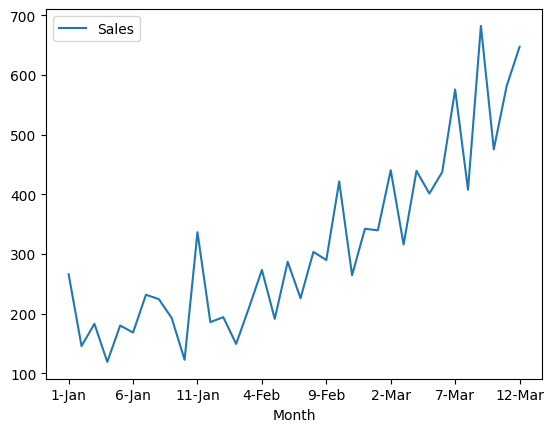

In [19]:
sham_tf.plot()

<Axes: xlabel='Month'>

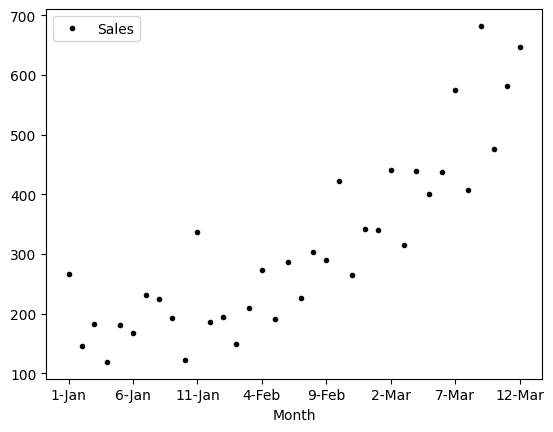

In [20]:
sham_tf.plot(style='k.')

In [22]:
sham_ma = sham_tf.rolling(window=10).mean()

<Axes: xlabel='Month'>

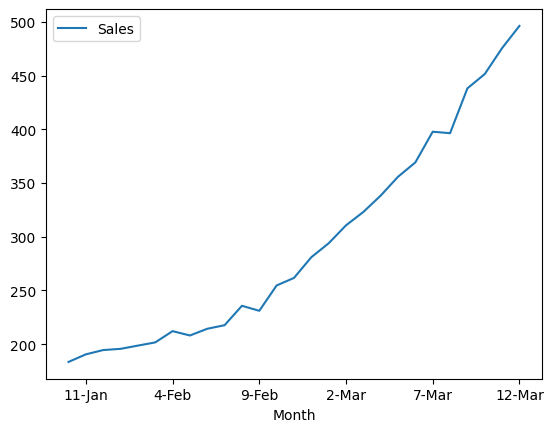

In [23]:
sham_ma.plot()

In [24]:
# baseline   naive    initial    starting  model
# previou value is best reflector

In [26]:
sham_base = pd.concat([sham_tf,sham_tf.shift(1)],axis=1)

In [27]:
sham_base

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [29]:
sham_base.columns = ['Actual_Sales','Forecast_Sales']

In [31]:
sham_base.dropna(inplace=True)

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [33]:
sham_error = mean_squared_error(sham_base.Actual_Sales,sham_base.Forecast_Sales)

In [34]:
sham_error

11715.388285714285

In [35]:
np.sqrt(sham_error)

108.23764726616282

In [36]:
# ARIMA(auto_regressive,differencing,moving_average) p d f

#ACF for moving_average AND PACF  for auto_regressive

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

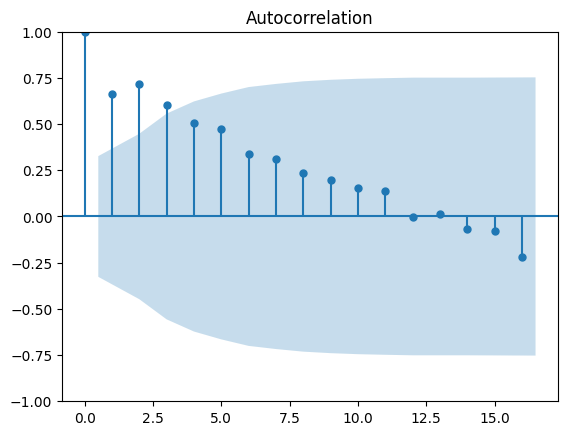

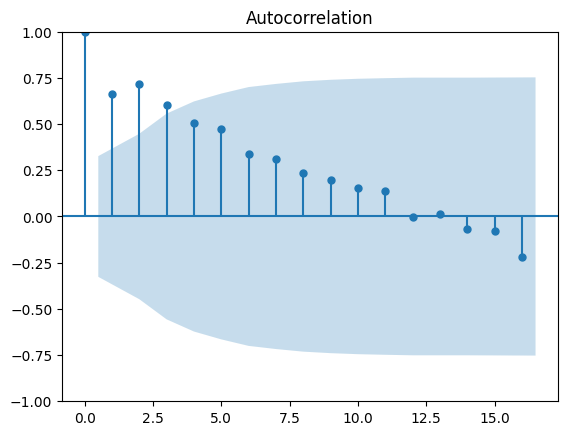

In [37]:
plot_acf(sham_tf)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


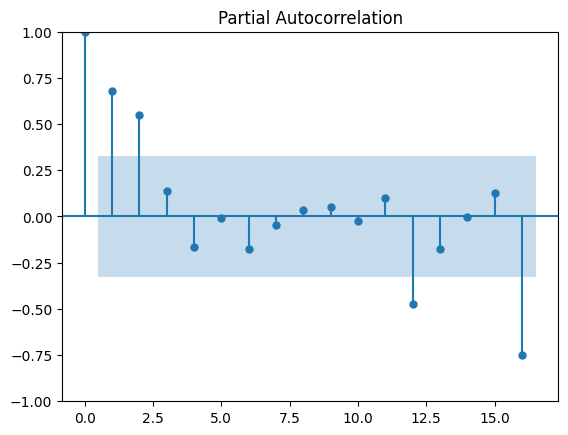

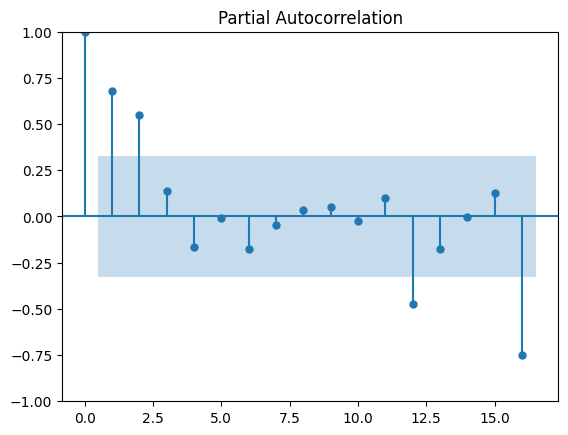

In [38]:
# Q = 3  (upto this outside region)
plot_pacf(sham_tf)

In [43]:
# p = 2

# d is in [0,2]

from statsmodels.tsa.arima.model import ARIMA

sham_train = sham_tf[:25]
sham_test = sham_tf[25:36]

In [45]:
sham_model = ARIMA(sham_train,order=(2,1,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
sham_model_fit = sham_model.fit()

In [47]:
sham_model_fit.aic    # lesser the value better fit

278.46527471997587

In [50]:
sham_forecast = sham_model_fit.forecast(steps=11)

In [51]:
sham_forecast

25    365.788199
26    352.488607
27    382.869112
28    375.541746
29    398.017292
30    394.510645
31    411.315022
32    410.195918
33    422.899013
34    423.220348
35    432.931021
Name: predicted_mean, dtype: float64

In [52]:
np.sqrt(mean_squared_error(sham_test,sham_forecast))

132.27751410506778

In [53]:
# but baseline model gives around 108 so this isn't acceptable

In [56]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)
import warnings
warnings.filterwarnings('ignore')

In [58]:
for p in p_values:
  for d in d_values:
    for q in q_values:
      order=(p,d,q)
      train,test = sham_tf[:25],sham_tf[25:36]
      predictions = list()
      for i in range(len(test)):
        try:
          model = ARIMA(train,order)
          model_fit = model.fit(disp=0)
          pred_y = model.forecast()
          predictions.append(pred_y)
          error = np.sqrt(mean_squared_error(test,predictions))
          print('ARIMA RMSE = %.2f'%(order,error))
          if error < 108.23764726616282:
            print("Acceptable!!!")
        except:
          continue
